In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv("../data/PreProcessed/MixWine.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_name
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [4]:
df_tree = df.copy()
X = df_tree.select_dtypes(include=['number']).drop(columns=['quality']) #data
y = df_tree['quality']                      #target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [24]:
tree = DecisionTreeClassifier(random_state=1)
tree.fit(X_train, y_train) #creating the tree

y_pred = tree.predict(X_test) #prediction
accuracy_score(y_test, y_pred)

0.5846153846153846

In [26]:
for i in range(3,11):
    tree_i = DecisionTreeClassifier(random_state=1, max_depth=i)
    tree_i.fit(X_train, y_train) #creating the tree
    y_pred_ = tree_i.predict(X_test) #prediction
    acc = accuracy_score(y_test, y_pred_)
    print(f"accuracy for max_depth = {i} = {acc}")

accuracy for max_depth = 3 = 0.5423076923076923
accuracy for max_depth = 4 = 0.5446153846153846
accuracy for max_depth = 5 = 0.5292307692307693
accuracy for max_depth = 6 = 0.5261538461538462
accuracy for max_depth = 7 = 0.5330769230769231
accuracy for max_depth = 8 = 0.5376923076923077
accuracy for max_depth = 9 = 0.556923076923077
accuracy for max_depth = 10 = 0.5615384615384615


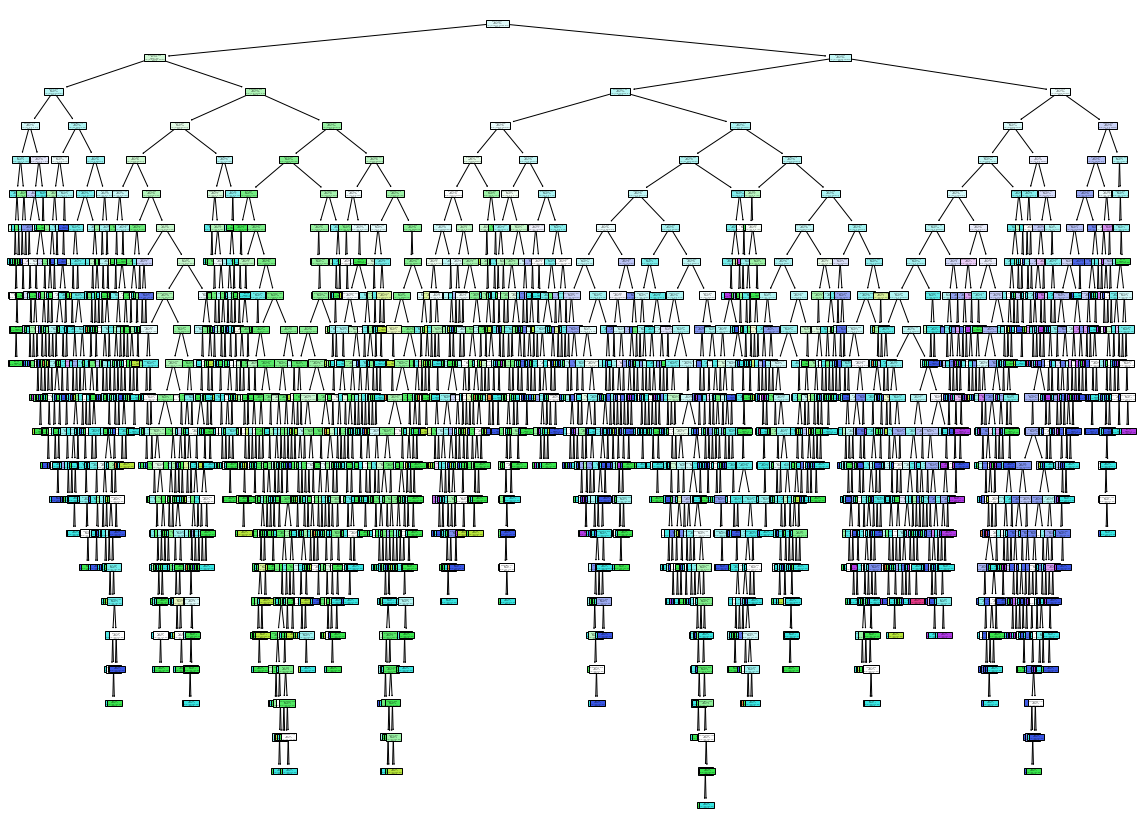

In [14]:
from sklearn.tree import plot_tree
y = y.astype(str)
plt.figure(figsize=(20, 15))
plot_tree(tree, feature_names=df_tree.columns, class_names=y, filled=True)
plt.show()

In [18]:
tree.tree_.max_depth

23

With a maximum depth of 3 we have a 54% accuracy, while with 23 we have 58%. The step is not great for such a different complexity.  That's why we need to do some pruning. A max depth of 10 could be a good trade-off. 

## What about a random forest

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
rfc = RandomForestClassifier(n_estimators=10, random_state=1, max_depth=10) #random forest with 10 trees

In [46]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=1, random_state=1)

In [47]:
accuracy = rfc.score(X_test, y_test)
print(f"Accuracy : {accuracy}")

Accuracy : 0.5615384615384615


With max_depth = 10 : <br>
Accuracy with 1 tree: 0.5615384615384615 <br>
Accuracy with 10 trees : 0.6261538461538462 <br>
Accuracy with 100 trees: 0.6338461538461538 <br>
Accuracy with 1000 trees: 0.6346153846153846 <br>

### With another target

In [63]:
df_tree2 = df.copy()
X2 = df_tree2.select_dtypes(include=['number']).drop(columns=['quality']) #data
y2 = df_tree2['quality']                      #target
y2 = y2.replace({3: 0, 4: 0, 5: 1, 6: 1, 7: 1, 8: 2, 9: 2})
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=1)

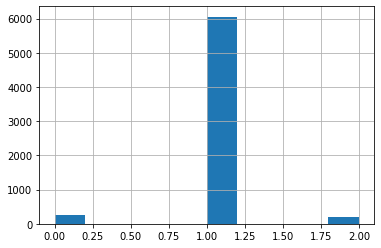

In [64]:
plt.figure()
y2.hist()
plt.show()

In [65]:
tree2 = DecisionTreeClassifier(random_state=1)
tree2.fit(X_train2, y_train2) #creating the tree

y_pred2 = tree2.predict(X_test2) #prediction
accuracy_score(y_test2, y_pred2)

0.8938461538461538

In [66]:
tree2.tree_.max_depth

32

In [78]:
max_d = 0
index = 0
for i in range(1,4):
    tree_i2 = DecisionTreeClassifier(random_state=1, max_depth=i)
    tree_i2.fit(X_train, y_train) #creating the tree
    y_pred_2 = tree_i2.predict(X_test) #prediction
    acc2 = accuracy_score(y_test, y_pred_2)
    if(acc2 > max_d):
        max_d = acc2
        index = i
    print(f"accuracy for max_depth = {i} = {acc2}")

accuracy for max_depth = 1 = 0.9346153846153846
accuracy for max_depth = 2 = 0.9346153846153846
accuracy for max_depth = 3 = 0.9276923076923077


In [79]:
index, max_d

(1, 0.9346153846153846)

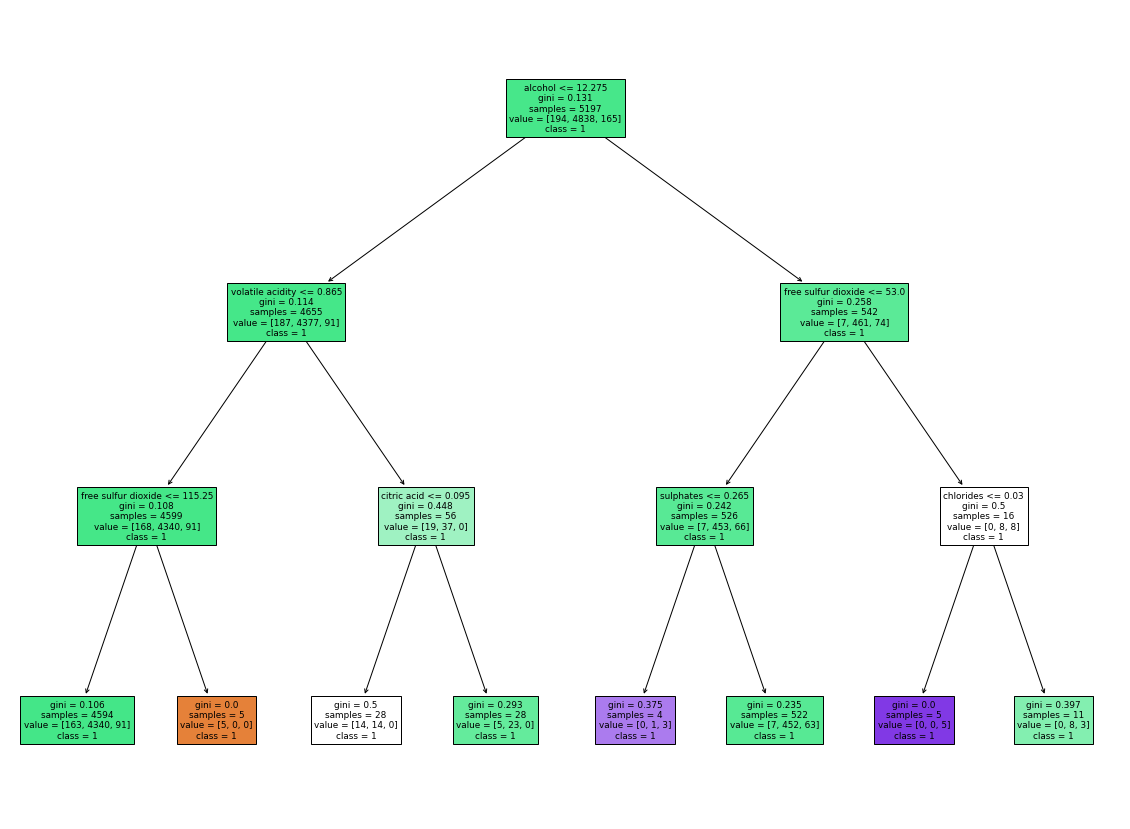

In [80]:
y2 = y2.astype(str)
plt.figure(figsize=(20, 15))
plot_tree(tree_i2, feature_names=df_tree.columns, class_names=y2, filled=True)
plt.show()

In [83]:
np.unique(y_pred2, return_counts=True)

(array([0, 1, 2]), array([  63, 1195,   42]))

In [87]:
rfc2 = RandomForestClassifier(n_estimators=10, random_state=1, max_depth=3) #random forest with 10 trees
rfc2.fit(X_train, y_train)
accuracy2 = rfc2.score(X_test, y_test)
print(f"Accuracy : {accuracy2}")

Accuracy : 0.9346153846153846
